# EEG-TEA: A Novel Application of Test-time Energy Adaptation in Electroencephalogram Decoding

In [10]:
from eeg_otta.utils.config_setup import setup_config
from eeg_otta.utils.get_accuracy import calculate_accuracy
from analysis.plots import plot_energy_accuracy_loss, plot_accuracy
from eeg_otta.utils.embedding_eval import plot_embeddings

import os
import torch

### 1. Run adaptation
Experiment loso:
- dataset_name: 2a
- dataset_setup: loso
- corruption_level: None

Experiment corruption:
- dataset_name: 2b
- dataset_setup: within
- corruption_level: 1, 2, 3, 4, 5

In [11]:
dataset_name = '2b' # ['2a', '2b']
dataset_setup = 'within' # ['within', 'loso']
corruption_level = 1 # [None, 1, 2, 3, 4, 5] (None = no corruption)

In [12]:
seeds = [0]
save_dir = {}
tea_model_dict = {}
adaptation_methods = [ 'source',  'entropy_minimization', 'tea']

for seed in seeds:
    for adaptation_method in adaptation_methods:
        print(f"Evaluating adaptation method: {adaptation_method}")
        model_cls, tta_cls, datamodule, config = setup_config(dataset_name, dataset_setup, adaptation_method, seed, corruption_level)
        test_accuracy, model_dict = calculate_accuracy(model_cls, tta_cls, datamodule, config, get_model_dict=True)

        if adaptation_method == 'tea':
            tea_model_dict = model_dict
        save_dir[adaptation_method] = config['tta_config']['save_dir']

Evaluating adaptation method: source
starting run for seed: 0
Setting all random seeds to 0, cuda_available=False


100%|█████████████████████████████████████| 34.2M/34.2M [00:00<00:00, 32.9GB/s]
SHA256 hash of downloaded file: 0da6e77ab0dab5b4aa1d2d5a6a542ac02f6768d3b7a76b0abe896ec1cf259919
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 18.6M/18.6M [00:00<00:00, 27.7GB/s]
SHA256 hash of downloaded file: 5effd365ae3733402286f2eea6b1ce482680a9f9ffc55c0b41bc63061a0161b5
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


updating model dict
 test_acc subject 1: 76.88%
Setting all random seeds to 0, cuda_available=False


100%|█████████████████████████████████████| 33.1M/33.1M [00:00<00:00, 58.8GB/s]
SHA256 hash of downloaded file: 1c4ace3eee8d72ca184fa6995a9466939b71175b8b3a129bdaa838a85adf6473
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 16.5M/16.5M [00:00<00:00, 20.4GB/s]
SHA256 hash of downloaded file: f057ada16e36e7d58e5670b705ab41aec1175afde0a1e1e0b96cae58dbc7a083
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


updating model dict
 test_acc subject 2: 66.07%
Setting all random seeds to 0, cuda_available=False


100%|█████████████████████████████████████| 35.6M/35.6M [00:00<00:00, 50.2GB/s]
SHA256 hash of downloaded file: 4ae1b23b4b4359151787a1a61d3acea128719677c49bfaf0113748cffece3b98
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 19.3M/19.3M [00:00<00:00, 21.5GB/s]
SHA256 hash of downloaded file: 6fca9dd9cbbdbb53dd8fb2798feed8e22669a91d1259fdac6695855756181353
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


updating model dict
 test_acc subject 3: 82.19%
Setting all random seeds to 0, cuda_available=False


100%|█████████████████████████████████████| 35.7M/35.7M [00:00<00:00, 53.4GB/s]
SHA256 hash of downloaded file: e7230d6d28a9e81d3afdf7ba5d363979e0186dbbc5a73f66d4b713be020ce960
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 17.9M/17.9M [00:00<00:00, 33.2GB/s]
SHA256 hash of downloaded file: a08bbc7efb12a29b9ac901c810a42f84053a268b567c0c5c705d401038c6d7f6
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


120 events found on stim channel stim
Event IDs: [1 2]
140 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


updating model dict
 test_acc subject 4: 97.19%
Setting all random seeds to 0, cuda_available=False


100%|█████████████████████████████████████| 35.0M/35.0M [00:00<00:00, 38.7GB/s]
SHA256 hash of downloaded file: 53166e2cf1a97576262b3f2f27395f489af6fda15ade5c3b3cdd2c89f7df0d79
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 17.5M/17.5M [00:00<00:00, 17.5GB/s]
SHA256 hash of downloaded file: a395a547e62241f6bf69b1b42828d394f997189271ebd90d5ff4dde4e4e9e757
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


120 events found on stim channel stim
Event IDs: [1 2]
140 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


updating model dict
 test_acc subject 5: 96.56%
Setting all random seeds to 0, cuda_available=False


100%|█████████████████████████████████████| 36.5M/36.5M [00:00<00:00, 53.6GB/s]
SHA256 hash of downloaded file: d69f679ea33121a9202901d5b62efb50f8ed004fa8ad70d10a59351493ffdad8
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 19.4M/19.4M [00:00<00:00, 23.4GB/s]
SHA256 hash of downloaded file: c13d76a3bcd6fd445482e3268d38ebd51f28ea286869fc22c47c6d39857b2f2f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


updating model dict
 test_acc subject 6: 86.25%
Setting all random seeds to 0, cuda_available=False


100%|█████████████████████████████████████| 33.1M/33.1M [00:00<00:00, 37.0GB/s]
SHA256 hash of downloaded file: 0b79522d66710a88f852b83802c7bffd015226d765480f60f16b6bedc5ea33c2
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 17.9M/17.9M [00:00<00:00, 37.0GB/s]
SHA256 hash of downloaded file: 29900042a1adee5f722410f8e52e46961f356b68d5a7906df05df04319fde2f1
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


updating model dict
 test_acc subject 7: 88.13%
Setting all random seeds to 0, cuda_available=False


100%|█████████████████████████████████████| 38.0M/38.0M [00:00<00:00, 52.2GB/s]
SHA256 hash of downloaded file: d96bdfd0c8331f238740c10ff03121dc3e3a20a4b1254840c5cc4878aa149b67
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 19.0M/19.0M [00:00<00:00, 35.5GB/s]
SHA256 hash of downloaded file: d616cd7f843e899fb01cd1fa86a2a8dd0fd2f2e4db94ab3a09e6b9f8d5a6399a
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


160 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


updating model dict
 test_acc subject 8: 91.56%
Setting all random seeds to 0, cuda_available=False


100%|█████████████████████████████████████| 33.3M/33.3M [00:00<00:00, 62.2GB/s]
SHA256 hash of downloaded file: 4f017991a64ceabb2ca73abf6f3c620b2b8fd7468184f52a8444dfdec1ee2adc
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 17.3M/17.3M [00:00<00:00, 16.8GB/s]
SHA256 hash of downloaded file: 99f3937393a3c4982beda69850cf3c6cde98dd33e1733a9d67a787e10f407bfd
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


updating model dict
 test_acc subject 9: 85.62%
test_acc: 85.61
Evaluating adaptation method: entropy_minimization
starting run for seed: 0
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


updating model dict
 test_acc subject 1: 77.19%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


updating model dict
 test_acc subject 2: 66.79%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


updating model dict
 test_acc subject 3: 85.31%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
140 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  1.34it/s]


updating model dict
 test_acc subject 4: 96.88%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
140 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  1.48it/s]


updating model dict
 test_acc subject 5: 97.81%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


updating model dict
 test_acc subject 6: 88.44%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


updating model dict
 test_acc subject 7: 90.00%
Setting all random seeds to 0, cuda_available=False
160 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


updating model dict
 test_acc subject 8: 91.56%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 1/1 [00:00<00:00,  1.37it/s]


updating model dict
 test_acc subject 9: 84.69%
test_acc: 86.52
Evaluating adaptation method: tea
starting run for seed: 0
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 8/8 [01:30<00:00, 11.34s/it]


updating model dict
 test_acc subject 1: 77.81%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 8/8 [01:15<00:00,  9.41s/it]


updating model dict
 test_acc subject 2: 66.43%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 8/8 [01:38<00:00, 12.28s/it]


updating model dict
 test_acc subject 3: 84.69%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
140 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 8/8 [01:37<00:00, 12.22s/it]


updating model dict
 test_acc subject 4: 97.81%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
140 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 8/8 [01:35<00:00, 11.94s/it]


updating model dict
 test_acc subject 5: 97.50%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 8/8 [01:36<00:00, 12.03s/it]


updating model dict
 test_acc subject 6: 88.44%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 8/8 [01:39<00:00, 12.39s/it]


updating model dict
 test_acc subject 7: 90.31%
Setting all random seeds to 0, cuda_available=False
160 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 8/8 [01:37<00:00, 12.23s/it]


updating model dict
 test_acc subject 8: 92.81%
Setting all random seeds to 0, cuda_available=False
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 1
#Trainable/total parameters: 2706/2706


100%|██████████| 8/8 [01:38<00:00, 12.27s/it]

updating model dict
 test_acc subject 9: 87.50%
test_acc: 87.03


### 2. Plot results

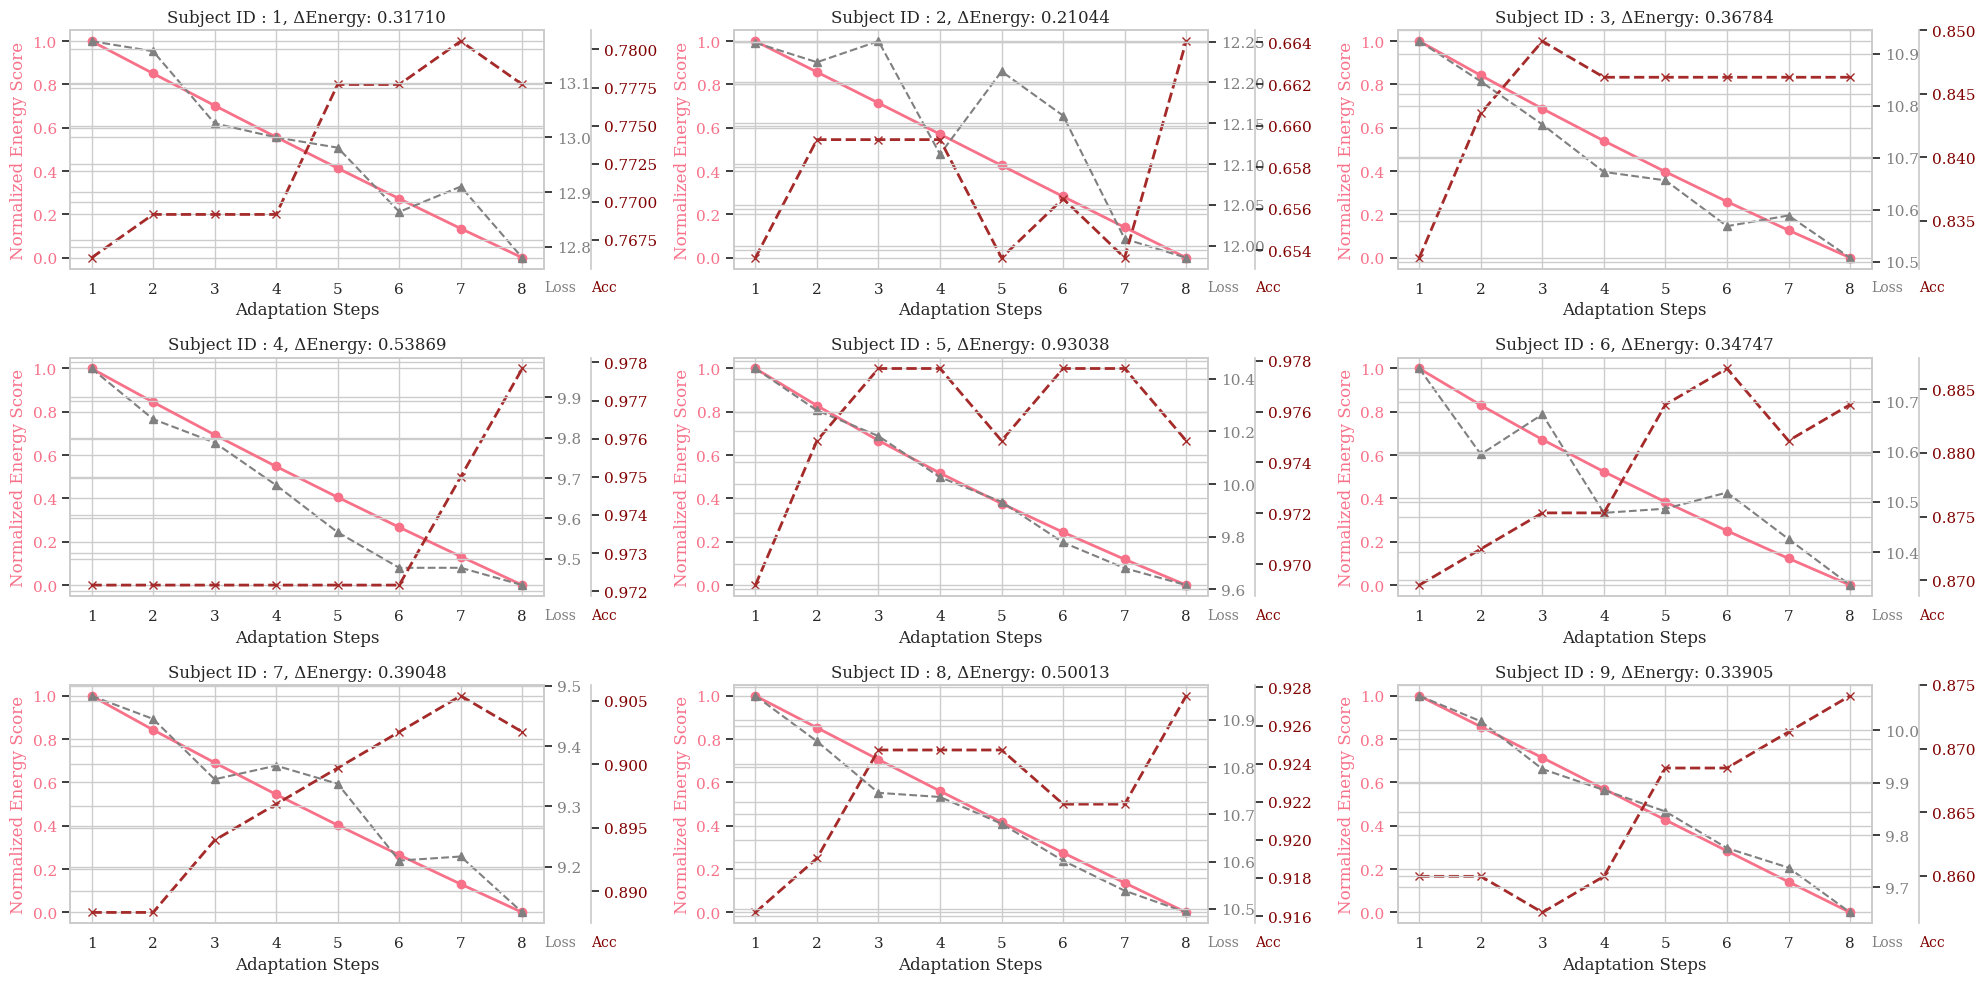

In [13]:
plot_energy_accuracy_loss(save_dir['tea'])

avg acc source : 0.8560515840848287 ± 0.0
avg acc entropy_minimization : 0.8651785651842753 ± 0.0
avg acc tea : 0.8703373008304172 ± 0.0


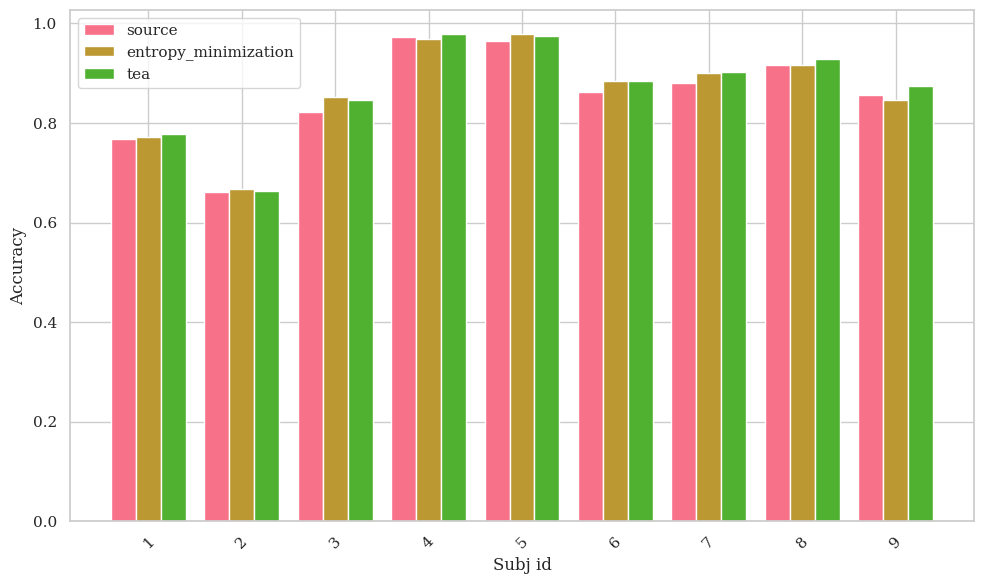

In [14]:
plot_accuracy(save_dir)

### 3. Plot PCA embeddings

#Trainable/total parameters: 2706/2706
120 events found on stim channel stim
Event IDs: [1 2]
120 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]
160 events found on stim channel stim
Event IDs: [1 2]


/home/lhorns/miniconda3/envs/eeg/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function scale is deprecated; will be removed in 0.8.0. Use numpy.multiply inside a lambda function instead.
  warnings.warn(msg, category=FutureWarning)


Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
Used Annotations descriptions: ['left_hand', 'right_hand']
corrupting data level: 5


100%|██████████| 5/5 [00:00<00:00, 30.95it/s]


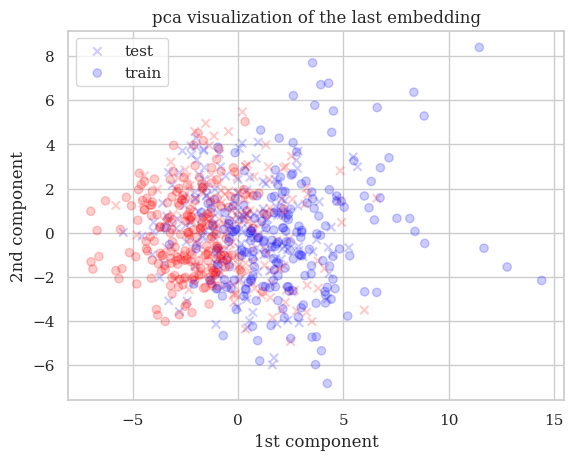

In [15]:
SUBJECT_ID = 1
corruption_level = 5
adapted = False

if not adapted:
    model_cls, tta_cls , datamodule, config = setup_config(dataset_name, dataset_setup, 'tea', 0, corruption_level)
    ckpt_path = os.path.join('./checkpoints',
                             config["source_run"],
                             str(SUBJECT_ID),
                             "model.ckpt")
    device = torch.device("mps" if torch.backends.mps.is_available()
                          else "cuda" if torch.cuda.is_available() else "cpu")
    config['tta_config']['subject_id'] = SUBJECT_ID
    config['tta_config']['initialise_log'] = ''

    model = tta_cls(model_cls.load_from_checkpoint(ckpt_path, map_location=device), config["tta_config"], datamodule.info)
else:
    model = tea_model_dict[SUBJECT_ID]

datamodule.subject_id = SUBJECT_ID
datamodule.prepare_data()
datamodule.setup()
datamodule.corruption_level = corruption_level

plot_embeddings(model, datamodule.train_dataloader(), datamodule.test_dataloader())